In [1]:
import cv2

from IPython.display import display, clear_output

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
smile = cv2.imread('Images/smile.jpg')
no_smile = cv2.imread('Images/nosmile.jpg')

Text(0.5, 1.0, 'No smile')

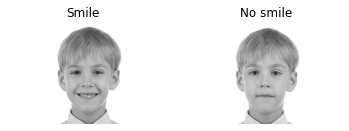

In [3]:
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Smile')
ax[1].imshow(cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('No smile')

In [4]:
cascadePath = "haarcascade_frontalface_default.xml"
# initialize a model for detecting whether a certain portion of an image contains a face
faceCascade = cv2.CascadeClassifier(cascadePath)

In [5]:
gray_smile = cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY)

In [6]:
faces = faceCascade.detectMultiScale(
        gray_smile,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
# output of the classifier
faces

array([[343, 179, 444, 444]])

(-0.5, 1079.5, 719.5, -0.5)

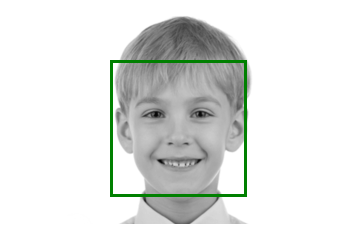

In [7]:
from matplotlib.patches import Rectangle

# visualize the detected face
fig, ax = plt.subplots()
ax.imshow(gray_smile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size    
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected    
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='green'))

ax.axis('off')

In [8]:
gray_nosmile = cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY)

# openCv algorithm to scan the image looking for haar features
# faces = ...
# SOLUTION:
faces = faceCascade.detectMultiScale(
        gray_nosmile,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
# output of the classifier
faces

array([[306, 179, 450, 450]])

(-0.5, 1079.5, 719.5, -0.5)

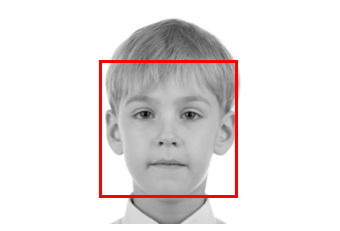

In [9]:
fig, ax = plt.subplots()
ax.imshow(gray_nosmile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    # SOLUTION:
    (x_nosmile, y_nosmile, w_nosmile, h_nosmile) = face
    
    # draw a rectangle where the face is detected
    # SOLUTION:
    ax.add_artist(Rectangle((x_nosmile, y_nosmile), w_nosmile, h_nosmile, fill=False, lw=3, color='red'))

ax.axis('off')

In [10]:
face_smile = gray_smile[y_smile:y_smile+h_smile, x_smile:x_smile+w_smile]

# The cropping coefficient for determining the size of the face
c1 = 0.2

# calculate how to crop the face
# vertical dimension
v_cut = int(c1 * w_smile)
# horizontal dimension
h_cut = int(c1 * h_smile)

# select only the face portion from the smile test image
cut_face_smile = gray_smile[y_smile+v_cut:y_smile+h_smile, 
                      x_smile+h_cut:x_smile-h_cut+w_smile]

In [11]:
face_nosmile = gray_nosmile[y_nosmile:y_nosmile+h_nosmile, x_nosmile:x_nosmile+w_nosmile]

# The cropping coefficient for determining the size of the face
c2 = 0.2

# calculate how to crop the face 
# vertical dimension
v_cut = int(c2 * w_nosmile)
# horizontal dimension
h_cut = int(c2 * h_nosmile)

# select only the face portion from the non smile test image
# cut_face_nosmile = ...
# SOLUTION:
cut_face_nosmile = gray_nosmile[y_nosmile+v_cut:y_nosmile+h_nosmile, 
                      x_nosmile+h_cut:x_nosmile-h_cut+w_nosmile]

(-0.5, 269.5, 359.5, -0.5)

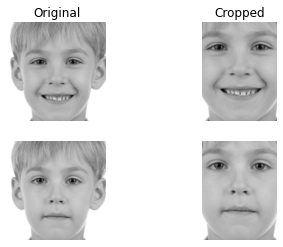

In [12]:
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(face_smile, cmap='gray')
ax[0][0].axis('off')
ax[0][0].set_title('Original')

ax[0][1].imshow(cut_face_smile, cmap='gray')
ax[0][1].axis('off')
ax[0][1].set_title('Cropped')

ax[1][0].imshow(face_nosmile, cmap='gray')
ax[1][0].axis('off')
ax[1][1].imshow(cut_face_nosmile, cmap='gray')
ax[1][1].axis('off')

In [13]:
import numpy as np
from scipy.ndimage import zoom

# transform the stretched smiling face so that it has 64x64 pixels
standardized_face_smile = zoom(cut_face_smile, (64. / cut_face_smile.shape[0], 
                                           64. / cut_face_smile.shape[1])).astype(np.float32)

In [14]:
standardized_face_smile /= float(255)

In [15]:
standardized_face_nosmile = zoom(cut_face_nosmile, (64. / cut_face_nosmile.shape[0], 
                                           64. / cut_face_nosmile.shape[1])).astype(np.float32)

# normalize the image so that its values are between 0 and 1
# standardized_face_nosmile /= ...
# SOLUTION:
standardized_face_nosmile /= float(255)

(-0.5, 63.5, 63.5, -0.5)

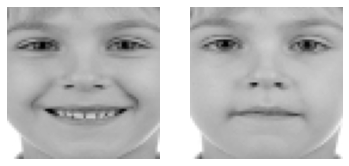

In [16]:
plt.subplot(121)
plt.imshow(standardized_face_smile[:, :], cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(standardized_face_nosmile[:, :], cmap='gray')
plt.axis('off')